<a href="https://colab.research.google.com/github/darsh0820/Deep-Learning_Neural-Network/blob/main/DL_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Neural Network

##Importing Libraries

In [13]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist

##Preparing the data

In [14]:
# Load and preprocess the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [15]:
## Normalize the pixel values to be between 0 and 1
#X_train = X_train.astype('float32') / 255.0
#X_test = X_test.astype('float32') / 255.0

In [16]:
# Flatten the images from 28x28 to 784 (since we're using a Dense layer)
X_train = X_train.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)

##Creating the model

In [17]:
# Create a simple Sequential model
model = models.Sequential()

In [18]:
# Add layers to the model

# Input layer with 784 inputs and 64 neurons
model.add(layers.Dense(100, activation='relu', input_shape=(784,)))
model.add(layers.BatchNormalization())

# Hidden layer with 64 neurons
model.add(layers.Dense(64, activation='relu'))
model.add(layers.BatchNormalization())

# Output layer with 10 outputs for classification
model.add(layers.Dense(10, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [20]:
# Summary of the model
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 100)                 │             400 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           6,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 86,270 (336.99 KB)

 Trainable params: 85,942 (335.71 KB)

 Non-trainable params: 328 (1.28 KB)

##Training the model

In [21]:
# Train the model with epoch updates and loss display
history = model.fit(X_train, y_train, epochs=5, batch_size=32, verbose=1)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.8722 - loss: 0.4186
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - accuracy: 0.9602 - loss: 0.1304
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9692 - loss: 0.0935
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9748 - loss: 0.0785
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9795 - loss: 0.0638


##Model Evaluation

In [22]:
# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f'\nTest accuracy: {test_acc}')

313/313 - 1s - 2ms/step - accuracy: 0.9762 - loss: 0.1173

Test accuracy: 0.9761999845504761


##Plotting prediction results

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


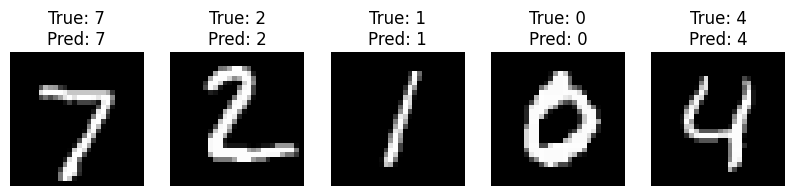

In [23]:
import matplotlib.pyplot as plt
import numpy as np

# Predicting the labels for the test set
predictions = model.predict(X_test)

# Function to plot images along with predictions
def plot_images(images, labels, predictions, num_images=5):
    plt.figure(figsize=(10, 5))
    for i in range(num_images):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(images[i].reshape(28, 28), cmap='gray')
        plt.title(f"True: {labels[i]}\nPred: {np.argmax(predictions[i])}")
        plt.axis('off')
    plt.show()

# Display some test images along with true labels and predicted labels
plot_images(X_test, y_test, predictions)

##Confusion matrix

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
y_test value: [7 2 1 ... 4 5 6]
y_test type: <class 'numpy.ndarray'>


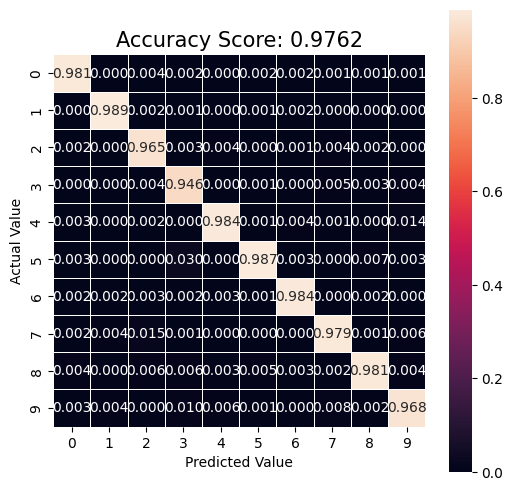

In [24]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

#Predict
y_prediction = model.predict(X_test)

# Convert predicted probabilities to class labels
y_prediction = np.argmax(y_prediction, axis=1)

# Check y_test
print(f"y_test value: {y_test}")
print(f"y_test type: {type(y_test)}")

#Create confusion matrix and normalizes it over predicted (columns)
cm = confusion_matrix(y_test, y_prediction , normalize='pred')

plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True)
plt.ylabel('Actual Value')
plt.xlabel('Predicted Value')
plt.title('Accuracy Score: {:.4f}'.format(test_acc), size = 15)
plt.show()